In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats.stats import pearsonr
import seaborn as sns
import time

In [5]:
z = np.load('./z.npy')
y = np.load('./y.npy')
ids = np.load('./id.npy')

z = z - np.mean(z)
y = y - np.mean(y)

In [12]:
print(z.shape)
print(y.shape)
print("outline area,", "outline perimeter,",
      "bounding area,", "bounding perimeter,",
      "length,", "width")
print(ids.shape)

(94443, 256)
(94443, 6)
outline area, outline perimeter, bounding area, bounding perimeter, length, width
(94443,)


In [29]:
num_latent = z.shape[1]
num_measurements = y.shape[1]
collinearities = np.empty(num_latent * num_measurements)
for l in range(num_latent):
    for m in range(num_measurements):
        collinearities[l*m + m] = (pearsonr(z[:,l], y[:,m])[0])**2

In [37]:
descending_rank = np.flip(np.argsort(collinearities))
print(np.max(collinearities))
for i in descending_rank[:20]:
    m, l = divmod(i,num_latent)
    print("Latent Var %i, Measurement %i, Corr %.5f" % (l, m, collinearities[i]))

0.001815742339037588
Latent Var 125, Measurement 0, Corr 0.00182
Latent Var 3, Measurement 0, Corr 0.00174
Latent Var 54, Measurement 0, Corr 0.00173
Latent Var 113, Measurement 2, Corr 0.00170
Latent Var 119, Measurement 1, Corr 0.00163
Latent Var 232, Measurement 3, Corr 0.00075
Latent Var 91, Measurement 0, Corr 0.00073
Latent Var 40, Measurement 0, Corr 0.00065
Latent Var 186, Measurement 0, Corr 0.00061
Latent Var 17, Measurement 1, Corr 0.00059
Latent Var 250, Measurement 0, Corr 0.00059
Latent Var 199, Measurement 1, Corr 0.00056
Latent Var 238, Measurement 2, Corr 0.00054
Latent Var 206, Measurement 4, Corr 0.00054
Latent Var 246, Measurement 0, Corr 0.00051
Latent Var 226, Measurement 2, Corr 0.00051
Latent Var 117, Measurement 3, Corr 0.00044
Latent Var 216, Measurement 3, Corr 0.00043
Latent Var 39, Measurement 1, Corr 0.00041
Latent Var 162, Measurement 3, Corr 0.00037


In [62]:
latent_cols = ['latent' + str(i) for i in range(num_latent)]
df = pd.DataFrame(z,columns=latent_cols)
df['length'] = y[:, -2]
df['width'] = y[:, -1]
df['area'] = y[:, 0]
df['package'] = ids
df['package'] = df.package.astype('category')

In [63]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[latent_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.36016118 0.03941809 0.02978206]


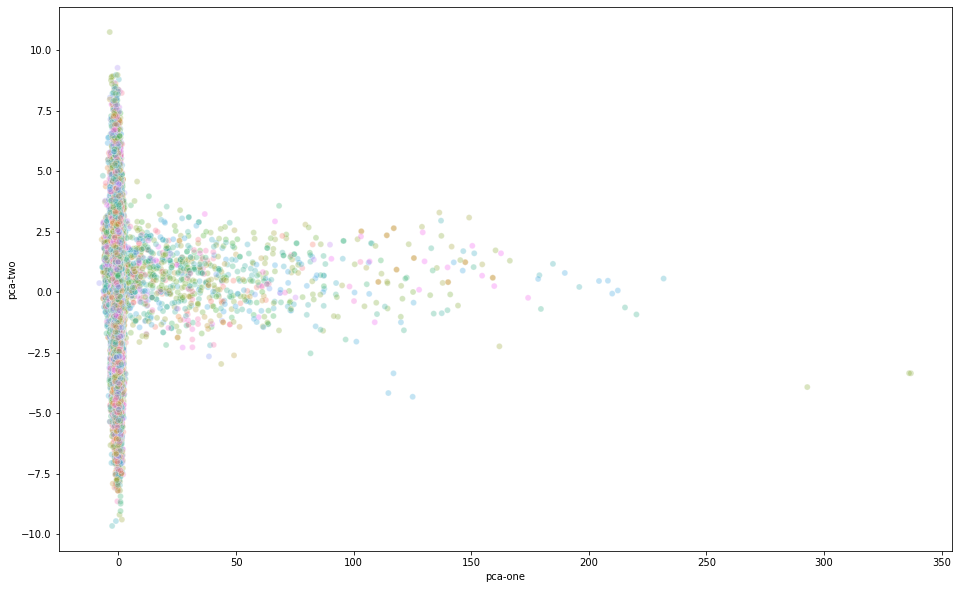

In [60]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="package",
    data=df.loc[rndperm,:],
    legend=False,
    alpha=0.3
)

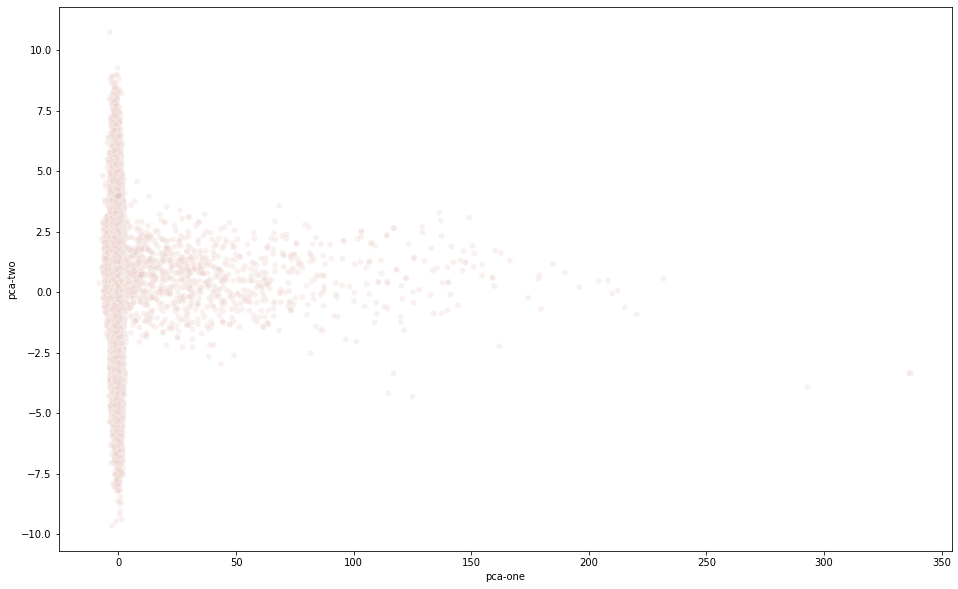

In [64]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="area",
    data=df.loc[rndperm,:],
    legend=False,
    alpha=0.3
)


In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="package",
    data=df.loc[rndperm,:],
    legend=False,
    alpha=0.3
)

In [73]:
N = 5000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[latent_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.296685   0.04250516 0.03324097]


In [74]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.052s...
[t-SNE] Computed neighbors for 5000 samples in 10.752s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.402777
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.826218
[t-SNE] KL divergence after 300 iterations: 3.604102
t-SNE done! Time elapsed: 28.75182843208313 seconds


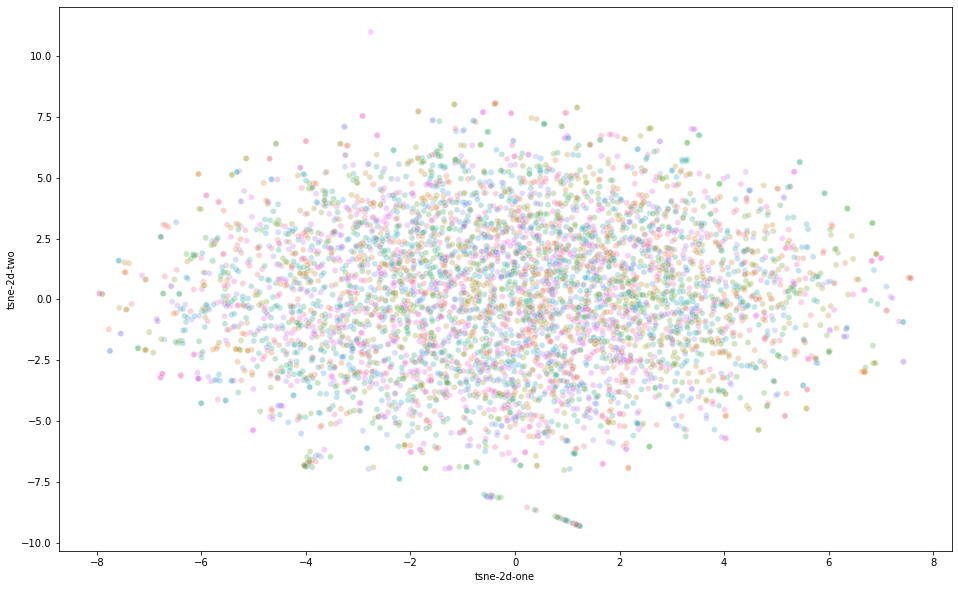

In [75]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="package",
    data=df_subset,
    legend=False,
    alpha=0.3
)